## Name of Project— Churn Prediction in Telecom Industry using Logistic Regression

According to EuropeanBusinessReview, telecommunication providers lose close to $65 million a month from customer churn. Isn’t that expensive? With many emerging telecom giants, the competition in the telecom sector is increasing and the chances of customers discontinuing a service are high. This is often referred to as Customer Churn in Telecom. Telecommunication providers that focus on quality service, lower—cost subscription plans, availability of content and features whilst creating positive customer service experiences have high chances of customer retention. The good news is that all these factors can be measured with different layers of data about billing history, subscription plans, cost of content, network/bandwidth utilization, and more to get a 360—degree view of the customer. This 360—degree view of customer data can be leveraged for predictive analytics to identify patterns and various trends that influence customer satisfaction and help reduce churn in telecom.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing all datasets

In [2]:
churn_data = pd.read_csv('G:\codeclause\Churn Prediction\churn_data.csv')

In [3]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv('G:\codeclause\Churn Prediction\customer_data.csv')

In [5]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv('G:/codeclause/Churn Prediction/internet_data.csv')

In [7]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


## Combining all datasets into one dataframe

In [8]:
#Merging on customer id
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [9]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

## Inspecting the final dataframe

In [10]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
#Dimension of the dataframe
telecom.shape

(7043, 21)

In [12]:
#Statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
#Type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Data Preparation
Converting some binary variables to 0/1

In [14]:
#List of variables to map
var_list = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

#Defining map function
def binary_map(x):
    return x.map({"Yes":1, "No":0})

#Applying functioon to the var_list
telecom[var_list] = telecom[var_list].apply(binary_map)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


## For categeorical variables with multiple levels, create dudmmy features (one-hot encode)

In [16]:
#Creating dummy variable for some of the categorical variables
dummy_1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

#Adding results to the telecom dataframe
telecom = pd.concat([telecom, dummy_1], axis=1)

In [17]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [18]:
#Creating dummy variables for the remining categrical variables

#For the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
ml_1 = ml.drop(['MultipleLines_No phone service'], 1)
telecom = pd.concat([telecom, ml_1], axis=1)

#For the variable 'OnlineSecurity'
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os_1 = os.drop(['OnlineSecurity_No internet service'], 1)
telecom = pd.concat([telecom, os_1], axis=1)

#For the variable 'OnlineBackup'
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob_1 = ob.drop(['OnlineBackup_No internet service'], 1)
telecom = pd.concat([telecom, ob_1], axis=1)

#For the variable 'DeviceProtection'
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp_1 = dp.drop(['DeviceProtection_No internet service'], 1)
telecom = pd.concat([telecom, dp_1], axis=1)

#For the variable 'TechSupport'
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts_1 = ts.drop(['TechSupport_No internet service'], 1)
telecom = pd.concat([telecom, ts_1], axis=1)

#For the variable 'StreamingTV'
stv = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
stv_1 = stv.drop(['StreamingTV_No internet service'], 1)
telecom = pd.concat([telecom, stv_1], axis=1)

#For the variable 'StreamingMovies'
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm_1 = sm.drop(['StreamingMovies_No internet service'], 1)
telecom = pd.concat([telecom, sm_1], axis=1)

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


## Dropping the repeated variables

In [20]:
#We have created dummy variables for the below variables, so we can drop them
telecom = telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [21]:
telecom = telecom[~(telecom.TotalCharges==" ")]

In [22]:
telecom.TotalCharges = telecom.TotalCharges.astype(float, errors="ignore")

In [23]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

Now we have all the variable type as numeric

## Checking for Outliers

In [24]:
#Checking for outliers in the continous variables
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]

In [25]:
#Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.
## Checking for Missing Values and Inputing Them

In [26]:
#Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

We don't have any missing values

## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#Putting feature variable to X
X = telecom.drop(['Churn', 'customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [29]:
#Putting response variable to Y
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [30]:
#Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1000)

## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
3715,-0.878804,1,1,0.437869,-0.630684,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
190,0.421040,1,1,0.218213,0.374679,0,1,1,1,0,...,1,0,1,0,0,1,1,0,0,1
2102,-0.594463,1,1,0.506096,-0.397857,0,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
3996,-0.350743,1,0,-1.484120,-0.799975,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6782,-0.878804,1,0,-0.474036,-0.780692,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [34]:
#Checking the churn rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

## Looking at Correlations

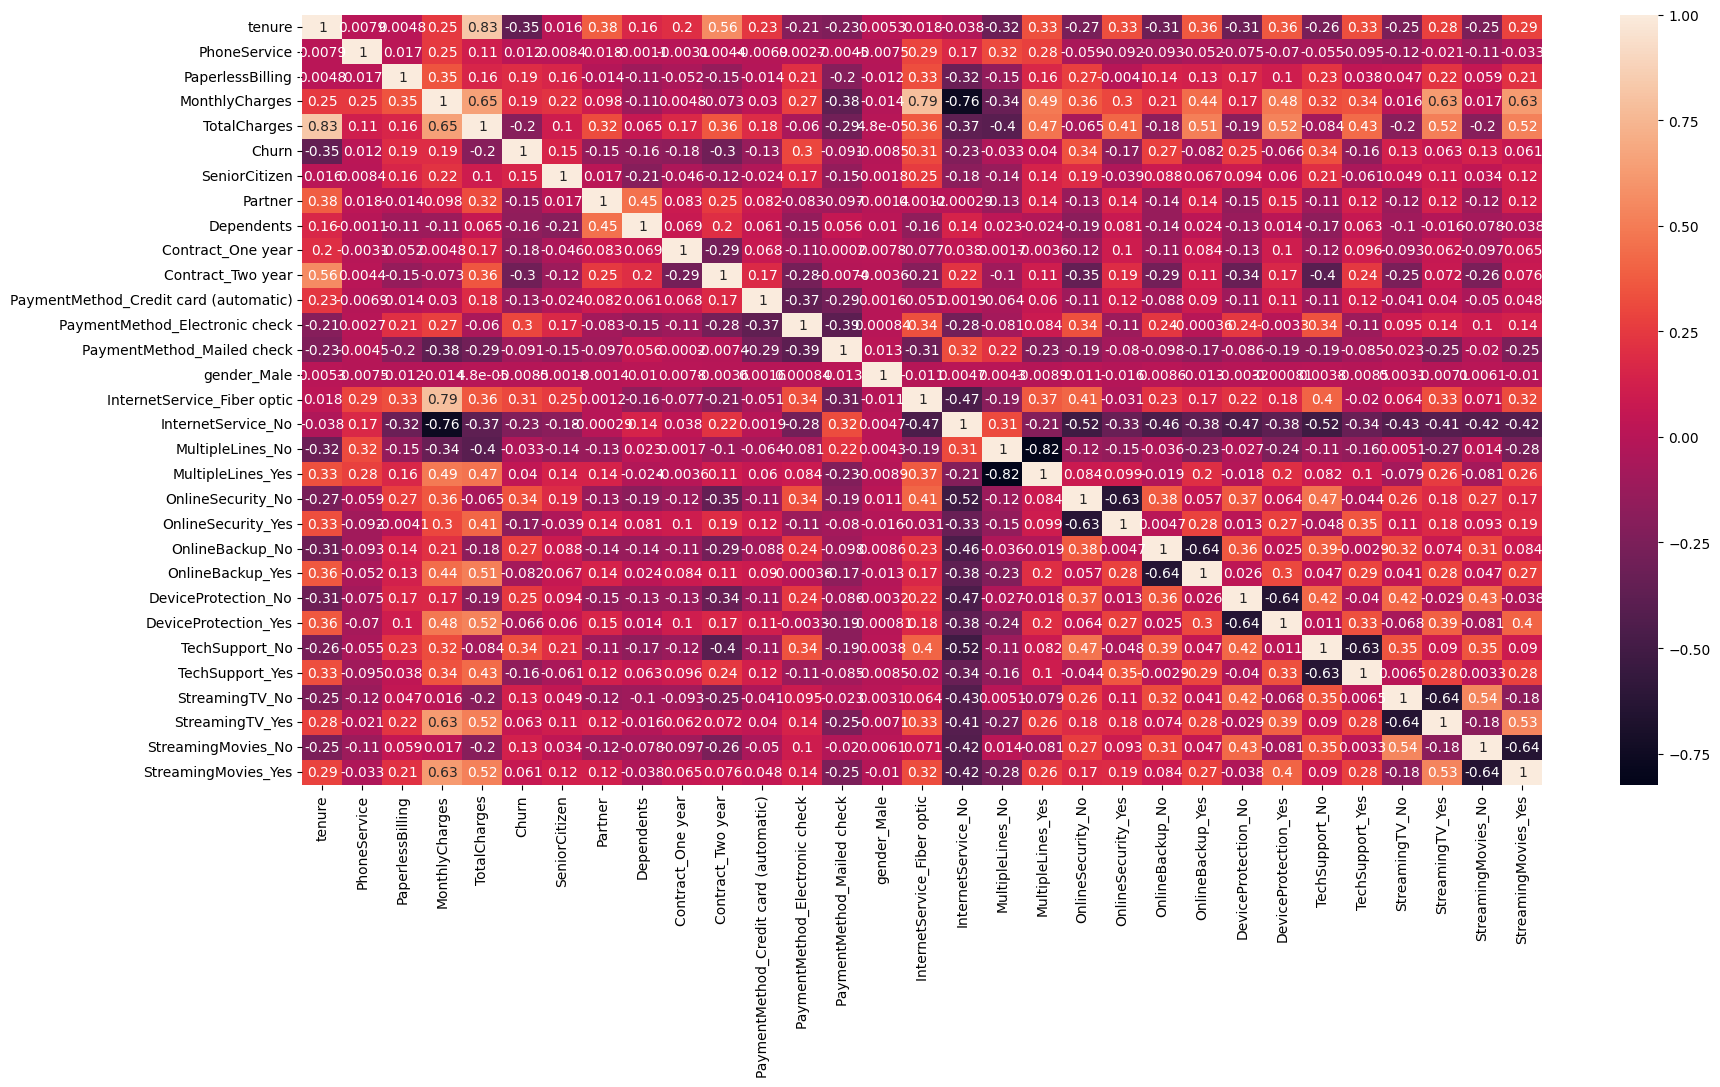

In [35]:
#Correlation matrix
plt.figure(figsize = (20,10))       #Size of figure
sns.heatmap(telecom.corr(), annot=True)
plt.show()

## Droppping highly correlated dummy variables

In [36]:
X_test = X_test.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'DeviceProtection_No', 'StreamingTV_No', 'StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'DeviceProtection_No', 'StreamingTV_No', 'StreamingMovies_No'], 1)

## Checking the Correlation Matrix
After dropping highly correlated variables, now let's check the correlation matrix again.

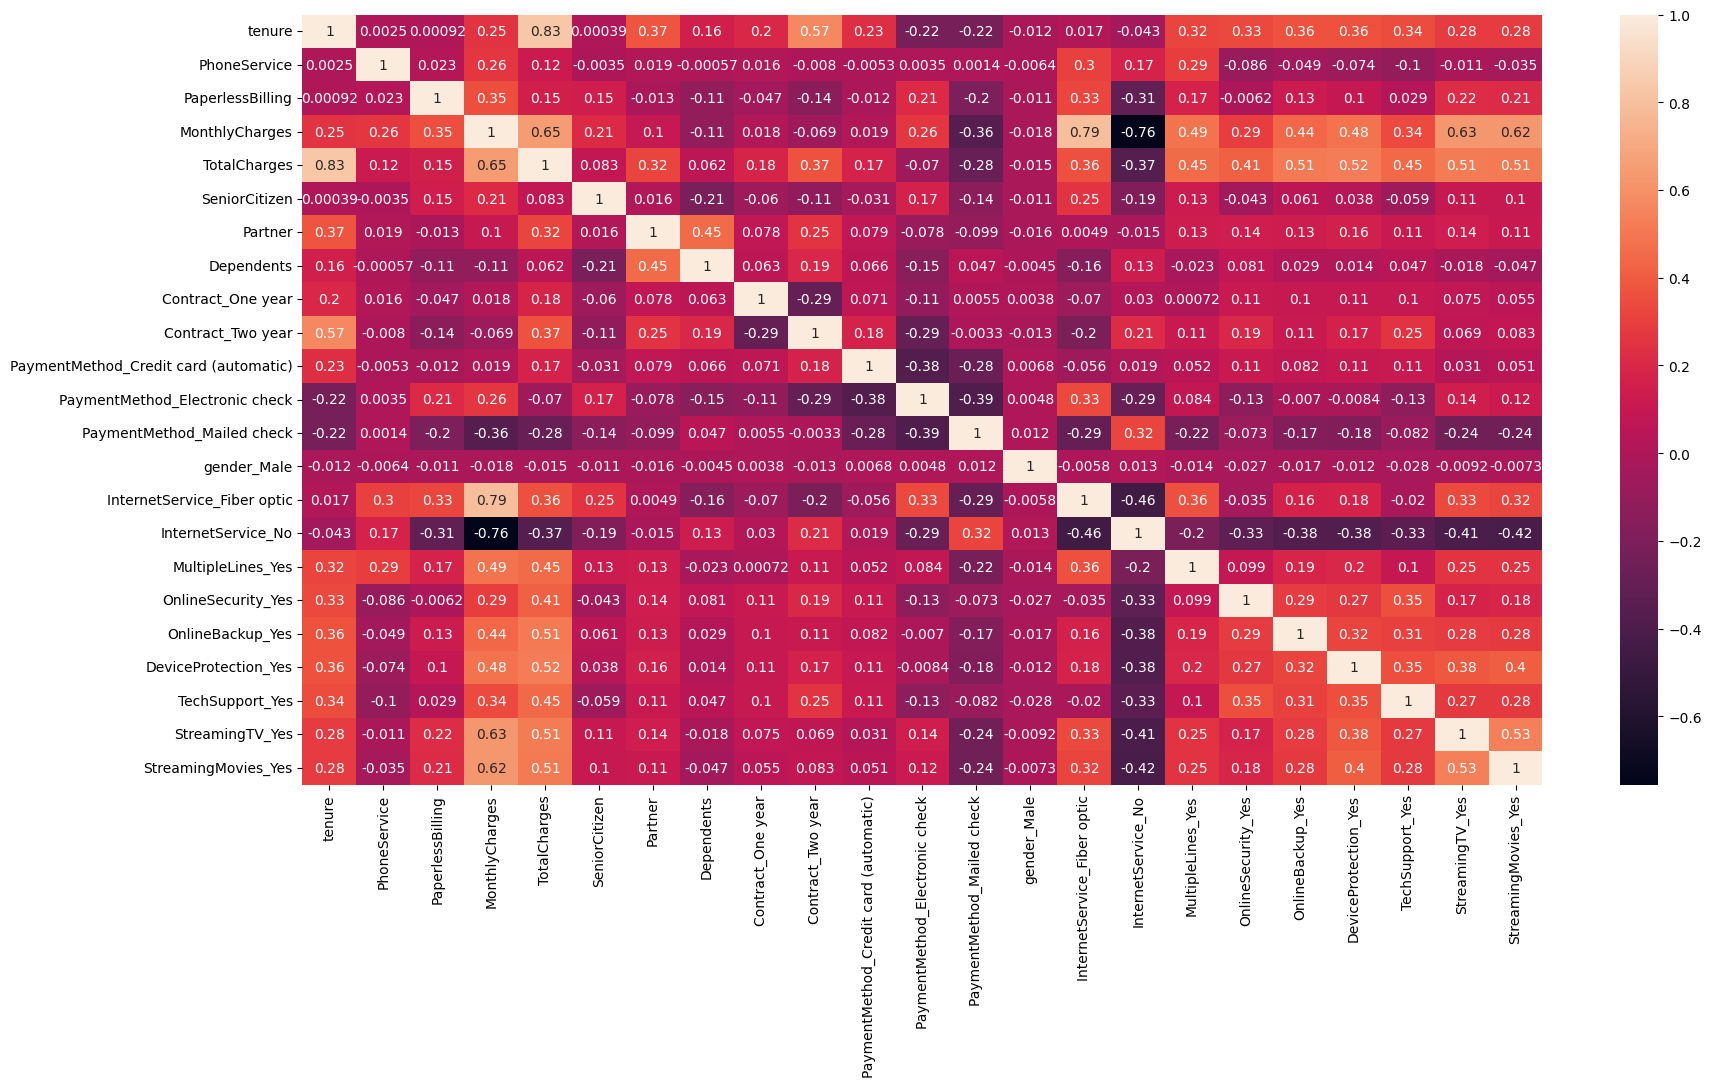

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building
Let's start by splitting the data into a training set and a test set.
Running the first training model.

In [38]:
import statsmodels.api as sm

In [39]:
#Logistic Regression model
logm = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.7
Date:                Sun, 18 Dec 2022   Deviance:                       4085.4
Time:                        22:01:29   Pearson chi2:                 5.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2837
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6456      1.539     -0.419      0.675      -3.663       2.371
tenure                                   -1.7716      0.186     -9.510      0.000      -2.137      -1.406
PhoneService                             -0.9290      0.774     -1.201      0.230      -2.445       0.587
PaperlessBilling                          0.2662      0.089      3.006      0.003       0.093       0.440
MonthlyCharges                            0.1156      1.138      0.102      0.919      -2.114       2.345
TotalCharges                              1.0870      0.195      5.585      0.000       0.706       1.468
SeniorCitizen                             0.1588      0.101      1.569      0.117      -0.040       0.357
Partner                                   0.0851      0.093      0.916      0.360      -0.097       0.267
Dependents                               -0.1708      0.107     -1.596      0.111      -0.381       0.039
Contract_One year                        -0.6042      0.128     -4.736      0.000      -0.854      -0.354
Contract_Two year                        -1.3535      0.208     -6.522      0.000      -1.760      -0.947
PaymentMethod_Credit card (automatic)    -0.1367      0.138     -0.988      0.323      -0.408       0.134
PaymentMethod_Electronic check            0.3127      0.113      2.775      0.006       0.092       0.534
PaymentMethod_Mailed check               -0.0684      0.138     -0.497      0.619      -0.338       0.201
gender_Male                               0.0046      0.077      0.060      0.952      -0.147       0.156
InternetService_Fiber optic               0.6485      0.953      0.680      0.496      -1.220       2.517
InternetService_No                       -0.6135      0.963     -0.637      0.524      -2.501       1.274
MultipleLines_Yes                         0.2047      0.211      0.972      0.331      -0.208       0.617
OnlineSecurity_Yes                       -0.4597      0.214     -2.148      0.032      -0.879      -0.040
OnlineBackup_Yes                         -0.2075      0.210     -0.989      0.323      -0.619       0.204
DeviceProtection_Yes                     -0.0876      0.210     -0.416      0.677      -0.500       0.325
TechSupport_Yes                          -0.5063      0.215     -2.355      0.019      -0.928      -0.085
StreamingTV_Yes                           0.0159      0.391      0.041      0.968      -0.750       0.781
StreamingMovies_Yes                       0.1879      0.389      0.483      0.629      -0.574       0.950
=========================================================================================================
"""

## Feature Selection Using RFE

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [43]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False])

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', False, 4),
 ('Partner', False, 10),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 7),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 11),
 ('gender_Male', False, 12),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 3),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 13),
 ('StreamingMovies_Yes', False, 2)]

In [45]:
col = X_train.columns[rfe.support_]

In [46]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

## Assessing the model with StatsModels

In [47]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.9
Date:                Sun, 18 Dec 2022   Deviance:                       4111.9
Time:                        22:01:31   Pearson chi2:                 5.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2799
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7820      0.158     -4.956      0.000      -1.091      -0.473
tenure                            -1.8598      0.178    -10.461      0.000      -2.208      -1.511
PhoneService                      -0.8503      0.156     -5.460      0.000      -1.155      -0.545
PaperlessBilling                   0.2979      0.087      3.406      0.001       0.126       0.469
TotalCharges                       1.2435      0.176      7.052      0.000       0.898       1.589
Contract_One year                 -0.6416      0.126     -5.102      0.000      -0.888      -0.395
Contract_Two year                 -1.4045      0.207     -6.793      0.000      -1.810      -0.999
PaymentMethod_Electronic check     0.4141      0.082      5.078      0.000       0.254       0.574
InternetService_Fiber optic        0.8324      0.117      7.116      0.000       0.603       1.062
InternetService_No                -0.7452      0.162     -4.612      0.000      -1.062      -0.429
OnlineSecurity_Yes                -0.4700      0.100     -4.706      0.000      -0.666      -0.274
TechSupport_Yes                   -0.5088      0.102     -4.992      0.000      -0.708      -0.309
==================================================================================================
"""

In [48]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3715    0.681846
190     0.036552
2102    0.527191
3996    0.015915
6782    0.364802
3262    0.453701
5299    0.403461
5710    0.133742
1314    0.251728
6862    0.734632
dtype: float64

In [49]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68184582, 0.03655171, 0.52719063, 0.0159151 , 0.36480208,
       0.45370078, 0.40346128, 0.13374202, 0.25172835, 0.73463192])

## Creating a dataframe with the actual churn flag and the predicted probabilities

In [50]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.681846,3715
1,0,0.036552,190
2,0,0.527191,2102
3,0,0.015915,3996
4,0,0.364802,6782


## Creating new column 'predicted' with 1 if Churn_prob > 0.5 else 0

In [51]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.681846,3715,1
1,0,0.036552,190,0
2,0,0.527191,2102,1
3,0,0.015915,3996,0
4,0,0.364802,6782,0


In [52]:
from sklearn import metrics

In [53]:
#COnfusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3209  391]
 [ 589  733]]


In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8008939455505892


## Checking VIFs

In [55]:
#Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
#Create a dataframe that will contain the names of all the feature variables and dtheir respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,PhoneService,7.66
3,TotalCharges,6.86
0,tenure,6.45
7,InternetService_Fiber optic,4.00
8,InternetService_No,3.15
5,Contract_Two year,3.13
2,PaperlessBilling,2.57
10,TechSupport_Yes,2.02
4,Contract_One year,1.88
9,OnlineSecurity_Yes,1.88


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

In [57]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [58]:
# Let's re-run the model using the selected variables
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.9
Date:                Sun, 18 Dec 2022   Deviance:                       4141.7
Time:                        22:01:32   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2755
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3557      0.120    -11.291      0.000      -1.591      -1.120
tenure                            -1.6753      0.174     -9.605      0.000      -2.017      -1.333
PaperlessBilling                   0.3055      0.087      3.513      0.000       0.135       0.476
TotalCharges                       1.0641      0.173      6.134      0.000       0.724       1.404
Contract_One year                 -0.6492      0.125     -5.186      0.000      -0.895      -0.404
Contract_Two year                 -1.3773      0.206     -6.680      0.000      -1.781      -0.973
PaymentMethod_Electronic check     0.4342      0.081      5.351      0.000       0.275       0.593
InternetService_Fiber optic        0.6043      0.107      5.642      0.000       0.394       0.814
InternetService_No                -1.0159      0.152     -6.684      0.000      -1.314      -0.718
OnlineSecurity_Yes                -0.4891      0.099     -4.919      0.000      -0.684      -0.294
TechSupport_Yes                   -0.5065      0.101     -4.994      0.000      -0.705      -0.308
==================================================================================================
"""

In [59]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [60]:
y_train_pred[:10]

array([0.6877371 , 0.04734523, 0.53163018, 0.01776618, 0.43048332,
       0.46242729, 0.39978803, 0.12907559, 0.25697333, 0.73739396])

In [61]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [62]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.687737,3715,1
1,0,0.047345,190,0
2,0,0.531630,2102,1
3,0,0.017766,3996,0
4,0,0.430483,6782,0


In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8021129622104836


So overall the accuracy hasn't dropped much.
So we can proceed with making predictions with this model only.

In [64]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3210,  390],
       [ 584,  738]], dtype=int64)

In [65]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8021129622104836

## Metrices beyond simply accuracy

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5582450832072617

In [68]:
# Let us calculate specificity
TN / float(TN+FP)

0.8916666666666667

In [69]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10833333333333334


In [70]:
# positive predictive value 
print (TP / float(TP+FP))

0.6542553191489362


In [71]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8460727464417501


## Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [72]:
def draw_roc(actual, probs):
        fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
        auc_score = metrics.roc_auc_score(actual, probs)
        plt.figure(figsize=(5, 5))
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0,1], [0,1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characterisstic example')
        plt.legend(loc="lower right")
        plt.show()

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate=False)

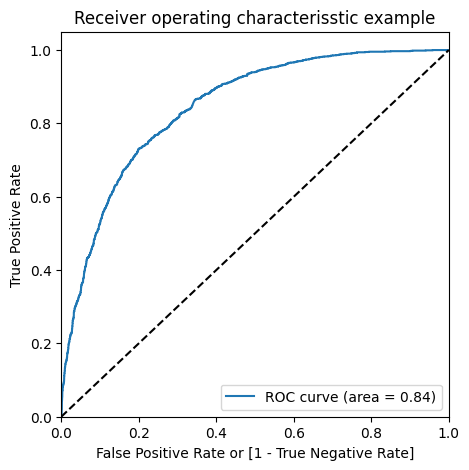

In [74]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

## Finding Optimal Cutoff point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [75]:
#Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.687737,3715,1,1,1,1,1,1,1,1,0,0,0
1,0,0.047345,190,0,1,0,0,0,0,0,0,0,0,0
2,0,0.531630,2102,1,1,1,1,1,1,1,0,0,0,0
3,0,0.017766,3996,0,1,0,0,0,0,0,0,0,0,0
4,0,0.430483,6782,0,1,1,1,1,1,0,0,0,0,0


In [76]:
#Calculating accuracyc sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.268590  1.000000  0.000000
0.1   0.1  0.609102  0.945537  0.485556
0.2   0.2  0.697684  0.875946  0.632222
0.3   0.3  0.755790  0.770045  0.750556
0.4   0.4  0.789923  0.681543  0.829722
0.5   0.5  0.802113  0.558245  0.891667
0.6   0.6  0.790735  0.375946  0.943056
0.7   0.7  0.766558  0.174735  0.983889
0.8   0.8  0.731410  0.000000  1.000000
0.9   0.9  0.731410  0.000000  1.000000


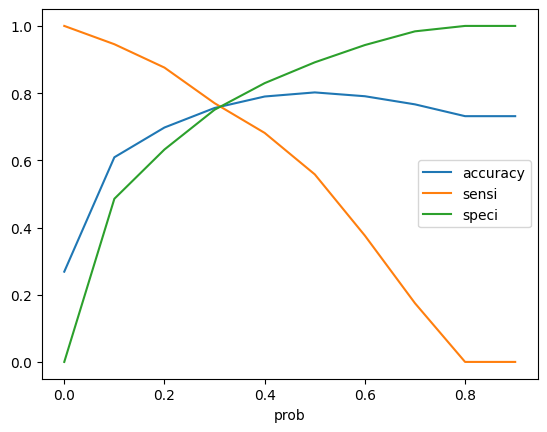

In [77]:
#Plotting accuracy sensitivivty and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.687737,3715,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.047345,190,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.531630,2102,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.017766,3996,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.430483,6782,0,1,1,1,1,1,0,0,0,0,0,1


In [79]:
#Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7557903291344982

In [80]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2702,  898],
       [ 304, 1018]], dtype=int64)

In [81]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7700453857791225

In [83]:
# Let us calculate specificity
TN / float(TN+FP)

0.7505555555555555

In [84]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.24944444444444444


In [85]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5313152400835073


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8988689288090486


## Precision and Recall

In [87]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3210,  390],
       [ 584,  738]], dtype=int64)

In [88]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6542553191489362

In [89]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5582450832072617

In [90]:
from sklearn.metrics import precision_score, recall_score

In [91]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6542553191489362

In [92]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5582450832072617

## Precision and recall tradeoff

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4917    0
 4918    0
 4919    0
 4920    1
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 4917    0
 4918    1
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

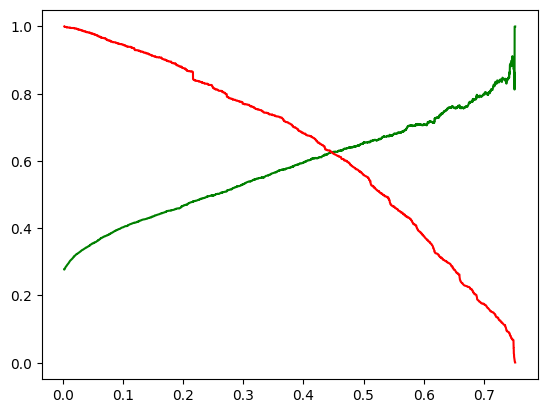

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [97]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [98]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes
3949,-0.594463,0,-0.578867,0,0,0,0,0,1,0
940,-0.350743,0,-0.780517,1,0,0,0,1,0,0
7027,-0.797564,0,-0.605606,0,0,0,0,0,0,1
3282,1.111582,0,1.679619,1,0,0,1,0,0,0
5643,-1.285006,1,-0.979761,0,0,1,1,0,0,1


In [99]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [100]:
y_test_pred = res.predict(X_test_sm)

In [101]:
y_test_pred[:10]

3949    0.187722
940     0.036837
7027    0.236775
3282    0.186087
5643    0.643854
4137    0.163618
6254    0.062173
930     0.466830
1778    0.001304
6485    0.126672
dtype: float64

In [102]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [103]:
y_pred_1.head()

,0
3949,0.187722
940,0.036837
7027,0.236775
3282,0.186087
5643,0.643854


In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [106]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
y_pred_final.head()

,Churn,CustID,0
0,0,3949,0.187722
1,0,940,0.036837
2,0,7027,0.236775
3,0,3282,0.186087
4,1,5643,0.643854


In [109]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [110]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [111]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,3949,0,0.187722
1,940,0,0.036837
2,7027,0,0.236775
3,3282,0,0.186087
4,5643,1,0.643854


In [112]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [113]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,3949,0,0.187722,0
1,940,0,0.036837,0
2,7027,0,0.236775,0
3,3282,0,0.186087,0
4,5643,1,0.643854,1


In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7872037914691943

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1302,  261],
       [ 188,  359]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6563071297989032

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.8330134357005758